In [110]:
## Importing libraries
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [57]:
df = pd.read_csv('startup_funding.csv')

In [58]:
data = df.copy()

## Problem Description :- For the locations Bangalore, Mumbai, NCR(Gurgaon, Noida and New Delhi), find the location where most number of funding is done?

In [59]:
data['CityLocation'] = data['CityLocation'].fillna(" ")

In [60]:
np_cities = ['Bangalore','Mumbai','NCR']
np_count = [0]*len(np_cities)
for i in data['CityLocation'].values:
    city = []
    if '/' in i:
        a = i.split('/')
        for j in a:
            city.append(j.strip())
    else:
        city.append(i)
    for j in city:
        if ('bangalore' == j) or ('Bangalore' == j):
            np_count[0]+=1
        if ('Mumbai' == j) or ('mumbai' == j):
            np_count[1]+=1
        if ('delhi' in j) or ('Delhi' in j) or ('noida' in j) or ('Noida' in j) or ('gurgaon' in j) or ('Gurgaon' in j):
            np_count[2]+=1  

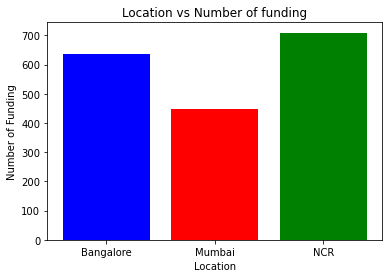

In [61]:
plt.bar(np_cities,np_count,color=['blue','red','green'])
plt.xlabel("Location")
plt.ylabel("Number of Funding")
plt.title("Location vs Number of funding")
plt.show()

###  Ans :- Location where Maximum number of fundings offered is "NCR".

## Problem Description :-  Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

In [111]:
data['InvestorsName'] = data['InvestorsName'].fillna("")

In [112]:
np_investors = []
np_count = []
for i in data['InvestorsName'].values:
    invest = []
    
    if ',' in i:
        a = i.split(',')
        for j in a:
            if ('Undisclosed investors' not in j) and ('undisclosed investors' not in j) and ('Undisclosed Investors' not in j):
                invest.append(j.strip())
    else:
        if ('Undisclosed investors' not in i) and ('undisclosed investors' not in i) and ('Undisclosed Investors' not in i):
            invest.append(i.strip())
    for j in invest:
        if j !='':
            if j in np_investors:
                index = np.where(np.array(np_investors)==j)[0][0]
                np_count[index]+=1
            else:
                np_investors.append(j)
                index = np.where(np.array(np_investors)==j)[0][0]
                np_count.append(1)
            

In [113]:
index = np.argsort(np_count)[::-1]
np_invest = []
np_coun = []
for i in range(0,5):
    ind = index[i] 
    np_invest.append(np_investors[ind])
    np_coun.append(np_count[ind])
    print(np_investors[ind],np_count[ind])

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


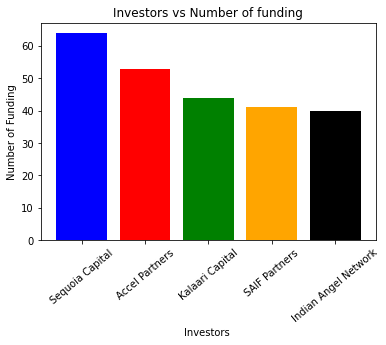

In [114]:
plt.bar(np_invest,np_coun,color=['blue','red','green','orange','black'])
plt.xlabel("Investors ")
plt.ylabel("Number of Funding")
plt.title("Investors vs Number of funding")
plt.xticks(rotation=40)
plt.show()

### This is the list of top 5 investors who has invested maximum number of times

## Problem Description :-  Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [115]:
dicts = {}
for i in range(0,len(data['StartupName'])):
    a = data['StartupName'][i].strip()
    
    if (a == 'Ola') or (a == 'Ola Cabs') or (a == 'Olacabs'):
        a = 'Ola'
    if (a == 'Flipkart') or (a == 'Flipkart.com'):
        a = 'Flipkart'
    if (a == 'Oyo Rooms') or (a == 'OyoRooms') or (a == 'Oyo') or (a=='Oyorooms') or (a== 'OYO Rooms'):
        a = 'Oyo'
    if (a == 'Paytm') or (a == 'Paytm Marketplace'):
        a = 'Paytm'
        
    
    b = data['InvestorsName'][i].strip()
    invest = []
    if ',' in b:
        c = b.split(',')
        for j in c:
            if ('Undisclosed investors' not in j) and ('undisclosed investors' not in j) and ('Undisclosed Investors' not in j):
                invest.append(j.strip())
    else:
        if ('Undisclosed investors' not in b) and ('undisclosed investors' not in b) and ('Undisclosed Investors' not in b):
            invest.append(b)
    
    for k in invest:
        if k !='':
            if k in dicts.keys():
                dicts[k].add(a)
            else:
                dicts[k] = {a}
    

In [116]:
np_investor = []
np_count = []
for key,value in dicts.items():
    np_investor.append(key)
    np_count.append(len(value))

In [117]:
index = np.argsort(np_count)[::-1]
np_invest = []
np_coun = []
for i in range(0,5):
    ind = index[i] 
    np_invest.append(np_investor[ind])
    np_coun.append(np_count[ind])
    print(np_investor[ind],np_count[ind])

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


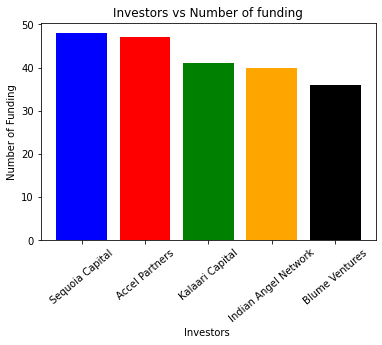

In [118]:
plt.bar(np_invest,np_coun,color=['blue','red','green','orange','black'])
plt.xlabel("Investors ")
plt.ylabel("Number of Funding")
plt.title("Investors vs Number of funding")
plt.xticks(rotation=40)
plt.show()

### Final list of investors with number of unique companies in which they have invested

## Problem Description :- Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [119]:
data['InvestmentType'] = data['InvestmentType'].fillna('')

In [120]:
dicts = {}
for i in range(0,len(data['StartupName'])):
    invest_type = data['InvestmentType'][i]
    if ('Seed' in invest_type) or ('Crowd' in invest_type):
        a = data['StartupName'][i].strip()
    
        if (a == 'Ola') or (a == 'Ola Cabs') or (a == 'Olacabs'):
            a = 'Ola'
        if (a == 'Flipkart') or (a == 'Flipkart.com'):
            a = 'Flipkart'
        if (a == 'Oyo Rooms') or (a == 'OyoRooms') or (a == 'Oyo') or (a=='Oyorooms') or (a== 'OYO Rooms'):
            a = 'Oyo'
        if (a == 'Paytm') or (a == 'Paytm Marketplace'):
            a = 'Paytm'
            
        b = data['InvestorsName'][i].strip()
        invest = []
        if ',' in b:
            c = b.split(',')
            for j in c:
                if ('Undisclosed investors' not in j) and ('undisclosed investors' not in j) and ('Undisclosed Investors' not in j):
                    invest.append(j.strip())
        else:
            if ('Undisclosed investors' not in b) and ('undisclosed investors' not in b) and ('Undisclosed Investors' not in b):
                invest.append(b)
    
        for k in invest:
            if k !='':
                if k in dicts.keys():
                    dicts[k].add(a)
                else:
                    dicts[k] = {a}
    

In [121]:
np_investor = []
np_count = []
for key,value in dicts.items():
    np_investor.append(key)
    np_count.append(len(value))

In [122]:
index = np.argsort(np_count)[::-1]
np_invest = []
np_coun = []
for i in range(0,5):
    ind = index[i] 
    np_invest.append(np_investor[ind])
    np_coun.append(np_count[ind])
    print(np_investor[ind],np_count[ind])

Indian Angel Network 33
Rajan Anandan 23
Anupam Mittal 16
LetsVenture 16
Kunal Shah 14


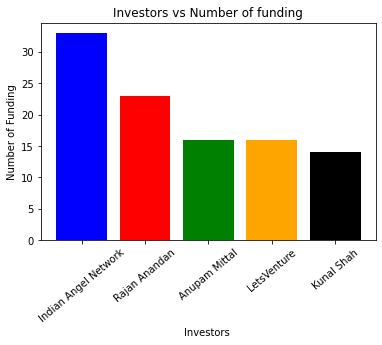

In [123]:
plt.bar(np_invest,np_coun,color=['blue','red','green','orange','black'])
plt.xlabel("Investors ")
plt.ylabel("Number of Funding")
plt.title("Investors vs Number of funding")
plt.xticks(rotation=40)
plt.show()

### List of top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding

## Problem Description :- Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [106]:
dicts = {}
for i in range(0,len(data['StartupName'])):
    invest_type = data['InvestmentType'][i]
    if ('Private' in invest_type):
        a = data['StartupName'][i].strip()
    
        if (a == 'Ola') or (a == 'Ola Cabs') or (a == 'Olacabs'):
            a = 'Ola'
        if (a == 'Flipkart') or (a == 'Flipkart.com'):
            a = 'Flipkart'
        if (a == 'Oyo Rooms') or (a == 'OyoRooms') or (a == 'Oyo') or (a=='Oyorooms') or (a== 'OYO Rooms'):
            a = 'Oyo'
        if (a == 'Paytm') or (a == 'Paytm Marketplace'):
            a = 'Paytm'
        
    
        b = data['InvestorsName'][i].strip()
        invest = []
        if ',' in b:
            c = b.split(',')
            for j in c:
                if ('Undisclosed investors' not in j) and ('undisclosed investors' not in j) and ('Undisclosed Investors' not in j):
                    invest.append(j.strip())
        else:
            if ('Undisclosed investors' not in b) and ('undisclosed investors' not in b) and ('Undisclosed Investors' not in b):
                invest.append(b)
    
        for k in invest:
            if k !='':
                if k in dicts.keys():
                    dicts[k].add(a)
                else:
                    dicts[k] = {a}
    

In [107]:
np_investor = []
np_count = []
for key,value in dicts.items():
    np_investor.append(key)
    np_count.append(len(value))

In [108]:
index = np.argsort(np_count)[::-1]
np_invest = []
np_coun = []
for i in range(0,5):
    ind = index[i] 
    np_invest.append(np_investor[ind])
    np_coun.append(np_count[ind])
    print(np_investor[ind],np_count[ind])

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


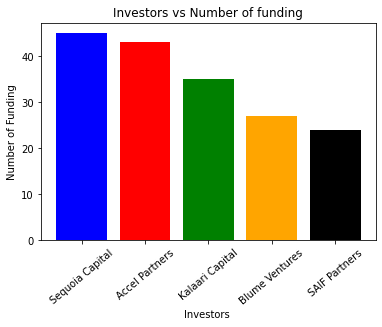

In [109]:
plt.bar(np_invest,np_coun,color=['blue','red','green','orange','black'])
plt.xlabel("Investors ")
plt.ylabel("Number of Funding")
plt.title("Investors vs Number of funding")
plt.xticks(rotation=40)
plt.show()

### List of top 5 investors who have invested in a different number of startups and their investment type is Private Equity